In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings("ignore")

# 1. Dataset “Babyboom”

In [958]:
colspecs = [
    (0, 8),
    (8, 16),
    (16, 24),
    (24, 32)
]

column_names = [
    "Time of birth",
    "Sex",
    "Birth weight in grams",
    "Number of minutes after midnight of each birth"
]

df = pd.read_fwf("/kaggle/input/babyboom/babyboom.dat.txt", colspecs=colspecs, header=None, names=column_names, 
                    dtype={
                        "Time of birth": int,
                        "Sex": int,
                        "Birth weight in grams": int,
                        "Number of minutes after midnight of each birth": int,
                    })

## Проверьте вес младенцев на нормальность. Сначала используйте все данные, не разделяя детей по полу, затем для группы мальчиков и девочек по отдельности. При проверке гипотез используйте точечные оценки параметров. Постройте доверительные интервалы для параметров нормального распределения. ##

Взглянем на гистрограмму. По ее внешнему виду уже можем определить, что распределение вряд ли является нормальным.

<Axes: xlabel='Birth weight in grams', ylabel='Count'>

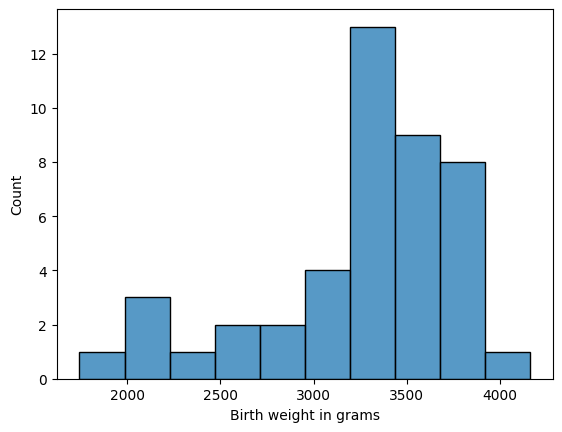

In [960]:
sns.histplot(data=df, x="Birth weight in grams")

Вычисляем параметры для нормального распределения.

In [961]:
mean = df["Birth weight in grams"].mean()
std = df["Birth weight in grams"].std()

Сравниваем эмпирические и теоретические квантили.

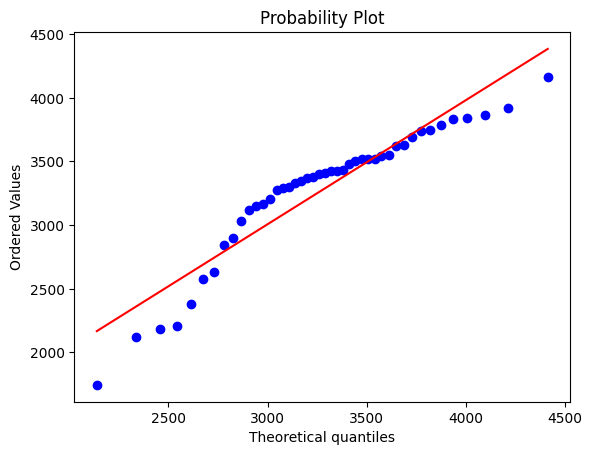

In [962]:
stats.probplot(df["Birth weight in grams"], dist="norm", sparams=(mean,std), plot=pylab)
pylab.show()

Определим функцию для тестирования распределения на нормальность.

In [1010]:
def perform_norm_tests(df, mean, std):
    ks = stats.kstest(rvs=df, cdf="norm", args=(mean, std))
    anderson = stats.anderson(x=df, dist="norm")
    cramer = stats.cramervonmises(rvs=df, cdf="norm", args=(mean, std))
    shapiro = stats.shapiro(x=df)
    jarque = stats.jarque_bera(x=df)

    print(f"{ks}\n\n{anderson}\n\n{cramer}\n\n{shapiro}\n\n{jarque}")

In [964]:
perform_norm_tests(df["Birth weight in grams"], mean, std)

KstestResult(statistic=0.18336357215784677, pvalue=0.09106523162555868, statistic_location=3278, statistic_sign=-1)

AndersonResult(statistic=1.7168461277690241, critical_values=array([0.534, 0.609, 0.73 , 0.852, 1.013]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3275.9545454545455, scale=528.0324582405921)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

CramerVonMisesResult(statistic=0.3112549380723357, pvalue=0.1254929058112806)

ShapiroResult(statistic=0.8987229755100873, pvalue=0.0009943974027275867)

SignificanceResult(statistic=10.351560931737778, pvalue=0.005651804151933801)


Критерий **Колмогорова-Смирнова**. pvalue > 0.05, **+**

Критерий **Андерсона-Дарлина**. Cтатистика **выше** всех критических значений для уровней значимости, **-**

Критерий **Крамера-фон-Мизеса**. pvalue > 0.05, **+**

Критерий **Шапиро-Уилка**. pvalue < 0.05, **-**

Критерий **Харке-Бера** для сравнения **ассиметрии** и **эксцесса** распределений. pvalue < 0.05, следовательно, по данному критерию распределение не близко по **ассиметрии** и **эксцессу** к нормальному. **-**



**Только критерии Колмогорова-Смирнова и Крамера-фон-Мизеса не опровергли гипотезу в то время, как остальные *опровергли* нулевую гипотезу. Делаем вывод, что распределение не является нормальным.**

Далее исследуем нормальность распределения веса **среди девочек**.

<Axes: xlabel='Birth weight in grams', ylabel='Count'>

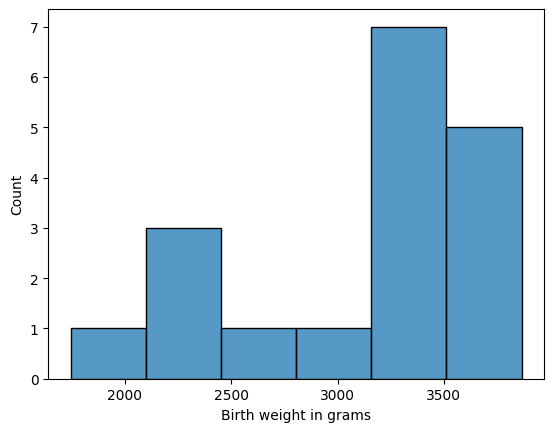

In [965]:
sns.histplot(data=df[df["Sex"] == 1], x="Birth weight in grams")

Вычисляем параметры для нормального распределения.

In [966]:
mean = df[df["Sex"] == 1]["Birth weight in grams"].mean()
std = df[df["Sex"] == 1]["Birth weight in grams"].std()

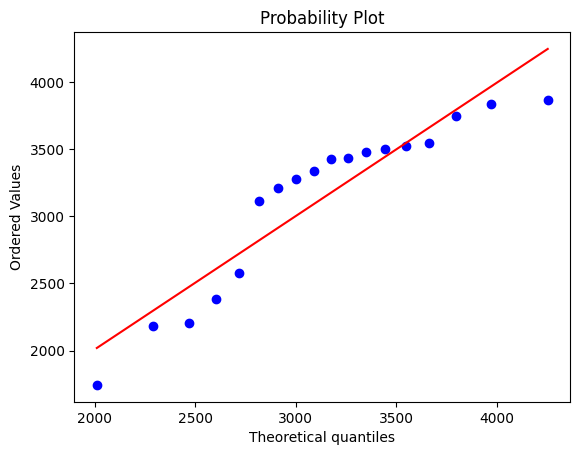

In [967]:
stats.probplot(df[df["Sex"] == 1]["Birth weight in grams"], dist="norm", sparams=(mean,std), plot=pylab)
pylab.show()

In [968]:
perform_norm_tests(df[df["Sex"] == 1]["Birth weight in grams"], mean, std)

KstestResult(statistic=0.21427812399671214, pvalue=0.3315835424835907, statistic_location=3208, statistic_sign=-1)

AndersonResult(statistic=1.0265607371000236, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3132.4444444444443, scale=631.582533586883)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

CramerVonMisesResult(statistic=0.19658426608975646, pvalue=0.2755359320143592)

ShapiroResult(statistic=0.8702829450561838, pvalue=0.017984789994719325)

SignificanceResult(statistic=2.477896004137788, pvalue=0.28968880972449024)


Критерий **Колмогорова-Смирнова**. pvalue > 0.05, **+**

Критерий **Андерсона-Дарлина**. Cтатистика **выше** всех критических значений для уровней значимости, **-**

Критерий **Крамера-фон-Мизеса**. pvalue > 0.05, **+**

Критерий **Шапиро-Уилка**. pvalue < 0.05, **-**

Критерий **Харке-Бера** для сравнения **ассиметрии** и **эксцесса** распределений. pvalue < 0.05, следовательно, по данному критерию распределение не близко по **ассиметрии** и **эксцессу** к нормальному. **+**


**Только критерии Колмогорова-Смирнова и Крамера-фон-Мизеса не опровергли гипотезу в то время, как остальные *опровергли* нулевую гипотезу. Делаем вывод, что распределение не является нормальным, однако имеет схожие с нормальным 3 и/или 4 моменты.**

Далее исследуем нормальность распределения веса **среди мальчиков**.

<Axes: xlabel='Birth weight in grams', ylabel='Count'>

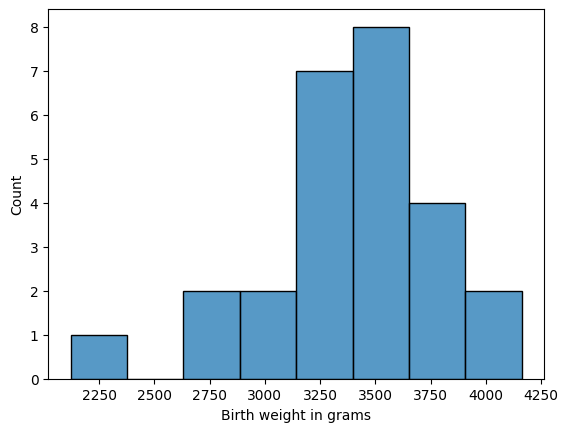

In [969]:
sns.histplot(data=df[df["Sex"] == 2], x="Birth weight in grams")

Вычисляем параметры для нормального распределения.

In [970]:
mean = df[df["Sex"] == 2]["Birth weight in grams"].mean()
std = df[df["Sex"] == 2]["Birth weight in grams"].std()

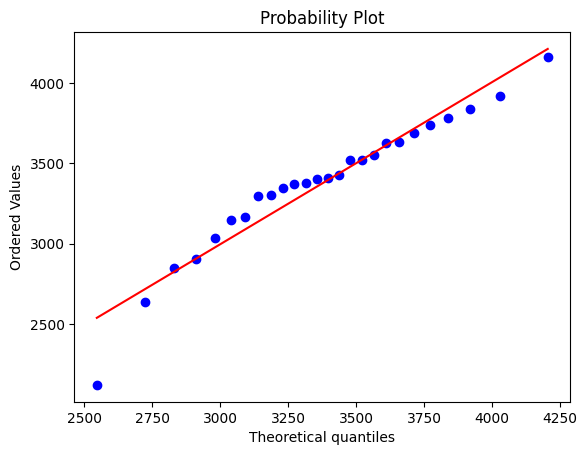

In [971]:
stats.probplot(df[df["Sex"] == 2]["Birth weight in grams"], dist="norm", sparams=(mean,std), plot=pylab)
pylab.show()

In [972]:
perform_norm_tests(df[df["Sex"] == 2]["Birth weight in grams"], mean, std)

KstestResult(statistic=0.15544307065675722, pvalue=0.5070763720555325, statistic_location=3294, statistic_sign=-1)

AndersonResult(statistic=0.47246625627482786, critical_values=array([0.516, 0.587, 0.705, 0.822, 0.978]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3375.3076923076924, scale=428.0460507217203)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

CramerVonMisesResult(statistic=0.08047214269781712, pvalue=0.6932369650973773)

ShapiroResult(statistic=0.9474738942208476, pvalue=0.20224825440795424)

SignificanceResult(statistic=5.570161003315512, pvalue=0.061724119936972875)


Критерий **Колмогорова-Смирнова**. pvalue > 0.05, **+**

Критерий **Андерсона-Дарлина**. Cтатистика **ниже** всех критических значений для уровней значимости, **+**

Критерий **Крамера-фон-Мизеса**. pvalue > 0.05, **+**

Критерий **Шапиро-Уилка**. pvalue > 0.05, **+**

Критерий **Харке-Бера** для сравнения **ассиметрии** и **эксцесса** распределений. pvalue > 0.05, следовательно, по данному критерию распределение не близко по **ассиметрии** и **эксцессу** к нормальному. **+**

**Ни один из критериев *не опроверг* нулевую гипотезу. Можем предположить, что распределение *является нормальным* и построить доверительные интервалы для его параметров.**

Определяем функцию для вычисления доверительных интервалов параметров нормального распределения.

In [973]:
def calc_conf_intervals(df, mean, std):
    # Определяем уровень доверия
    confidence_level = 0.95
    alpha = 1 - confidence_level

    # Считаем стандартную ошибку
    n = len(df)
    std_err = std / np.sqrt(len(df))
    
    # Вычисляем доверительный интервал для математического ожидания,
    # используя нормальное распределение
    confidence_interval_mean = stats.norm.interval(
        confidence=confidence_level,
        loc=mean,
        scale=std_err
    )

    
    # Вычисляем доверительный интервал для стандартного отклонения, 
    # используя распределение хи-квадрат
    chi2_lower = stats.chi2.ppf(1 - alpha / 2, n - 1)
    chi2_upper = stats.chi2.ppf(alpha / 2, n - 1)

    # Для дисперсии
    lower_variance = (n - 1) * std**2 / chi2_lower
    upper_variance = (n - 1) * std**2 / chi2_upper

    # Для стандартного отклонения
    lower_std_dev = np.sqrt(lower_variance)
    upper_std_dev = np.sqrt(upper_variance)
    
    print(f"Интервал для математического ожидания: {confidence_interval_mean}\n" \
    f"Интервал для стандартного отклонения: ({lower_std_dev}, {upper_std_dev})")

In [974]:
calc_conf_intervals(df, mean, std)

Интервал для математического ожидания: (3248.8304909102326, 3501.784893705152)
Интервал для стандартного отклонения: (353.6614249788274, 542.3452783601427)


## Проверьте гипотезу о том, что время между рождением детей подчиняется экспоненциальному распределению. При проверке гипотезы используйте точечные оценки параметров. ##


In [975]:
time_diff_df = df["Number of minutes after midnight of each birth"].diff()
time_diff_df.dropna(inplace=True)

По виду гистограммы уже можно предположить, что распределение является экспоненциальным.

<Axes: xlabel='Number of minutes after midnight of each birth', ylabel='Count'>

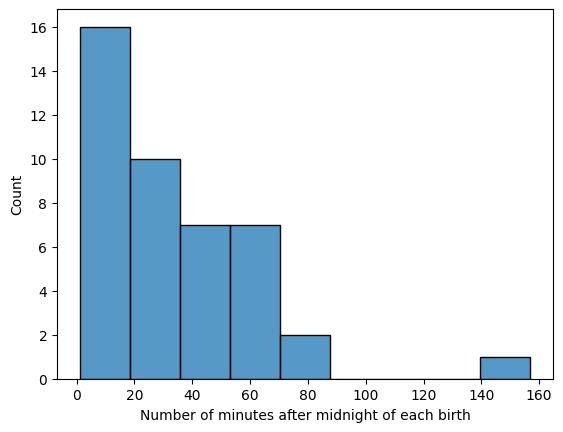

In [976]:
sns.histplot(data=time_diff_df)

Вычисляем параметр для экспоненциального распределения.

In [977]:
scale = time_diff_df.mean()

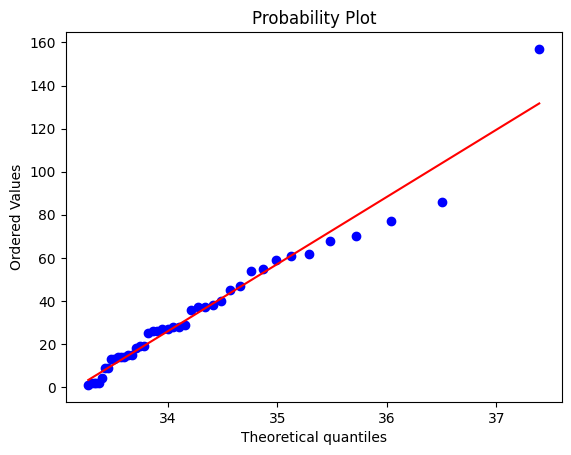

In [978]:
stats.probplot(time_diff_df, dist="expon", sparams=(scale), plot=pylab)
pylab.show()

Определяем функцию для тестирования распределения на принадлежность к экспоненциальному.

In [979]:
def perform_expon_tests(df, mean):
    ks = stats.kstest(rvs=df, cdf="expon", args=(0,mean))
    anderson = stats.anderson(x=df, dist="expon")
    cramer = stats.cramervonmises(rvs=df, cdf="expon", args=(0,mean))

    print(f"{ks}\n\n{anderson}\n\n{cramer}")

In [980]:
perform_expon_tests(time_diff_df, scale)

KstestResult(statistic=0.13751184043266534, pvalue=0.3574267136129613, statistic_location=13.0, statistic_sign=-1)

AndersonResult(statistic=0.6249143415753551, critical_values=array([0.909, 1.063, 1.323, 1.584, 1.93 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=33.25581395348837)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

CramerVonMisesResult(statistic=0.10870226034687437, pvalue=0.5458215459226182)


Критерий **Колмогорова-Смирнова**. pvalue > 0.05, **+**

Критерий **Андерсона-Дарлина**. Cтатистика **ниже** всех критических значений для уровней значимости, **+**

Критерий **Крамера-фон-Мизеса**. pvalue > 0.05, **+**

**Ни один из критериев *не опроверг* нулевую гипотезу. Можем предположить, что распределение *является экспоненциальным*.**

## Проверьте гипотезу, подчиняется ли количество рождений в час для каждого часа распределению Пуассона. При проверке гипотезы используйте точечные оценки параметров. ##

Определяем столбец со значением часа, в котором родился ребенок.

In [981]:
df["Hour of birth"] = df["Time of birth"] // 100

In [982]:
births_per_hour = df["Hour of birth"].value_counts().sort_index()

<Axes: xlabel='Hour of birth', ylabel='Count'>

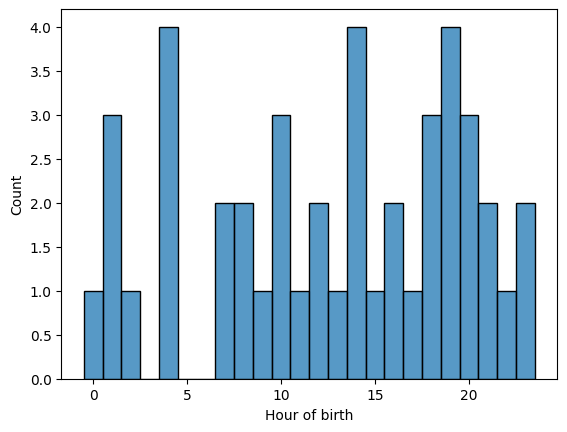

In [983]:
sns.histplot(df["Hour of birth"], bins=len(df["Hour of birth"]), discrete=True)

Вычисляем параметр для распределения Пуассона

In [984]:
mean = df["Hour of birth"].mean()

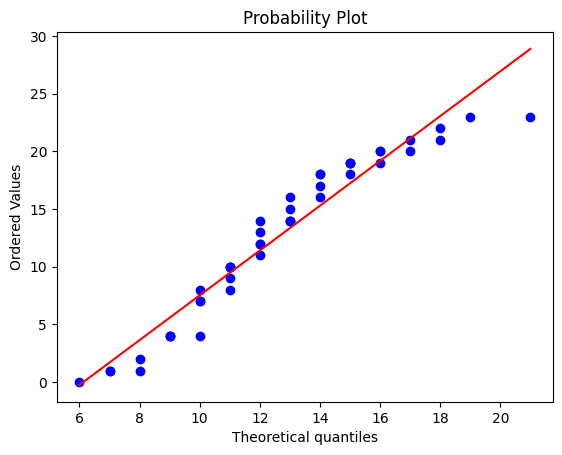

In [985]:
stats.probplot(df["Hour of birth"], dist="poisson", sparams=(mu,), plot=pylab)
pylab.show()

Определяем функцию для тестирования распределения на принадлежность к распределению Пуассона.

In [986]:
def perform_expon_tests(df, mean):
    ks = stats.kstest(rvs=df, cdf="poisson", args=(mean,))
    cramer = stats.cramervonmises(rvs=df, cdf="poisson", args=(mean,))

    
    births_per_hour = df.value_counts().sort_index()

    all_hours = pd.Series(0, index=np.arange(0, 24))
    observed_counts = all_hours.add(births_per_hour, fill_value=0)

    expected_counts = stats.poisson.pmf(np.arange(24), mu) * np.sum(observed_counts)
    if not np.isclose(np.sum(observed_counts), np.sum(expected_counts), rtol=1.4901161193847656e-08):
        expected_counts = expected_counts * (np.sum(observed_counts) / np.sum(expected_counts))

    # Критерий Пирсона
    chi2_statistic, p_value = stats.chisquare(f_obs=observed_counts.values, f_exp=expected_counts)

    print(f"{ks}\n\n{cramer}\n\nPearsonResult (statistic={chi2_statistic}, pvalue={p_value})")

In [987]:
def draw_comparison():
    plt.bar(range(len(observed_counts)), observed_counts / sum(observed_counts), label='Observed', alpha=0.7)
    plt.bar(range(len(expected_counts)), expected_counts / sum(expected_counts), label='Expected', alpha=0.7)
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title('Observed vs Expected Births per Hour')
    plt.legend()
    plt.show()

In [988]:
perform_expon_tests(df["Hour of birth"], mean)

KstestResult(statistic=0.2829450529539481, pvalue=0.001308871008725454, statistic_location=18, statistic_sign=-1)

CramerVonMisesResult(statistic=1.0595171339124496, pvalue=0.0016384504517520382)

PearsonResult (statistic=12719.483649360682, pvalue=0.0)


Критерий **Колмогорова-Смирнова**. pvalue < 0.05, **-**

Критерий **Крамера-фон-Мизеса**. pvalue < 0.05, **-**

Критерий **Пирсона**. pvalue < 0.05, **-**

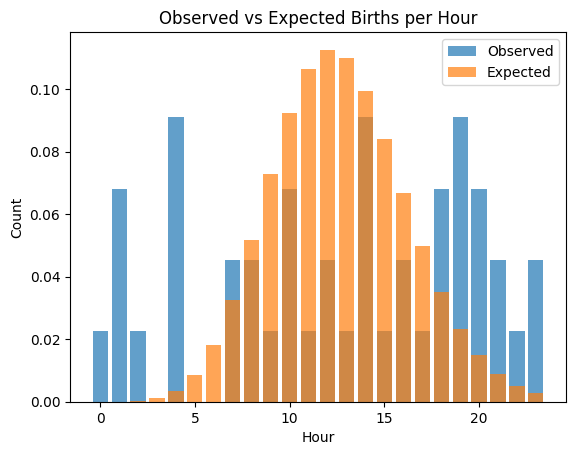

In [989]:
draw_comparison()

**Все критерии *опровергли* нулевую гипотезу. Можем предположить, что распределение *не является* распределением Пуассона.**

# 2. Dataset “Euroweight”

In [990]:
column_names = [
    "ID",
    "weight",
    "batch"
]

df = pd.read_csv("/kaggle/input/euroweight/euroweight.txt", delim_whitespace=True, header=None, names=column_names, 
                    dtype={
                        "ID": int,
                        "weight": float,
                        "batch": int
                    })

**Проверить гипотезу о нормальном распределении веса монет (сначала объединить все монеты в одну выборку, потом по каждому пакету в отдельности). При проверке гипотез используйте точечные оценки параметров. Постройте доверительные интервалы для параметров нормального распределения.**

Сначала проверяем распределение **всей** выборки на нормальность.

<Axes: xlabel='weight', ylabel='Count'>

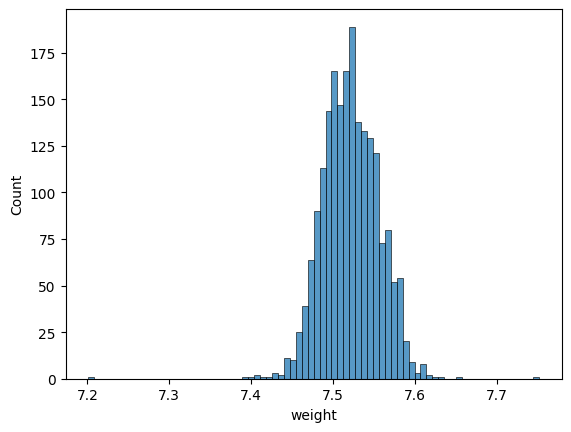

In [991]:
sns.histplot(data=df, x="weight")

Вычисляем параметры для нормального распределения.

In [992]:
mean = df["weight"].mean()
std = df["weight"].std()

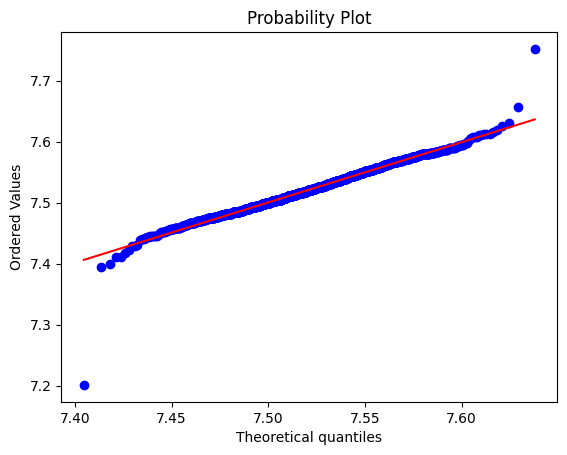

In [993]:
stats.probplot(df["weight"], dist="norm", sparams=(mean,std), plot=pylab)
pylab.show()

In [994]:
perform_norm_tests(df["weight"], mean, std)

KstestResult(statistic=0.023353803446905852, pvalue=0.22192512324841585, statistic_location=7.526, statistic_sign=1)

AndersonResult(statistic=1.6212909406187919, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=7.5212325, scale=0.03437914202613595)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

CramerVonMisesResult(statistic=0.1822380256000986, pvalue=0.3047098697646038)

ShapiroResult(statistic=0.9754729009998673, pvalue=5.0232770717677785e-18)

SignificanceResult(statistic=1645.2460197863131, pvalue=0.0)


Критерий **Колмогорова-Смирнова**. pvalue > 0.05, **+**

Критерий **Андерсона-Дарлина**. Cтатистика **ниже** всех критических значений для уровней значимости, **+**

Критерий **Крамера-фон-Мизеса**. pvalue > 0.05, **+**

Критерий **Шапиро-Уилка**. pvalue > 0.05, **+**

Критерий **Харке-Бера** для сравнения **ассиметрии** и **эксцесса** распределений. pvalue > 0.05, следовательно, по данному критерию распределение не близко по **ассиметрии** и **эксцессу** к нормальному. **+**

**Ни один из критериев *не опроверг* нулевую гипотезу, кроме критерия Шапиро-Уилка. Можем предположить, что распределение *является нормальным* и построить доверительные интервалы для его параметров.**

In [995]:
calc_conf_intervals(df, mean, std)

Интервал для математического ожидания: (7.519725795354421, 7.522739204645579)
Интервал для стандартного отклонения: (0.03334580812823817, 0.035479047501432236)


Далее проверяем распределение каждого batch-а на нормальность по отдельности.

In [996]:
for i in range(8):
    print(f"\n\n{i+1} batch\n")
    mean = df[df["batch"] == i+1]["weight"].mean()
    std = df[df["batch"] == i+1]["weight"].std()
    perform_norm_tests(df[df["batch"] == i+1]["weight"], mean, std)



1 batch

KstestResult(statistic=0.038472438278823295, pvalue=0.8389620125716332, statistic_location=7.506, statistic_sign=1)

AndersonResult(statistic=0.3589938358093434, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.075]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=7.519656, scale=0.03436132223683273)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

CramerVonMisesResult(statistic=0.06227480865176543, pvalue=0.800112339094617)

ShapiroResult(statistic=0.9955065633661141, pvalue=0.6830016984326865)

SignificanceResult(statistic=1.2951754199711618, pvalue=0.5233066227270129)


2 batch

KstestResult(statistic=0.03265930919143112, pvalue=0.9444808004928708, statistic_location=7.531, statistic_sign=1)

AndersonResult(statistic=0.3198658352252721, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.075]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(lo

**Нормальными распределениями обладают 1, 2, 4, 5, 7 batch-и. Можем вычислить для них доверительные интервалы параметров нормального распределения.**

In [997]:
for i in range(8):
    if (i+1 == 3 or i+1 == 6 or i+1 == 8):
        continue
    print(f"\n\n{i+1} batch\n")
    mean = df[df["batch"] == i+1]["weight"].mean()
    std = df[df["batch"] == i+1]["weight"].std()
    calc_conf_intervals(df[df["batch"] == i+1]["weight"], mean, std)



1 batch

Интервал для математического ожидания: (7.515396604634839, 7.523915395365162)
Интервал для стандартного отклонения: (0.031590213676967446, 0.037669491884706495)


2 batch

Интервал для математического ожидания: (7.518769245751872, 7.52756675424813)
Интервал для стандартного отклонения: (0.03262378217984407, 0.03890196219116049)


4 batch

Интервал для математического ожидания: (7.527457559815282, 7.534750440184718)
Интервал для стандартного отклонения: (0.027044172874328698, 0.03224860271714123)


5 batch

Интервал для математического ожидания: (7.5277236868715, 7.535068313128502)
Интервал для стандартного отклонения: (0.027236062039921356, 0.032477419382959664)


7 batch

Интервал для математического ожидания: (7.51892554184486, 7.527106458155139)
Интервал для стандартного отклонения: (0.030337274678576043, 0.036175435025371315)


# 3. Dataset “Iris”

In [998]:
column_names = [
    "sepal length",
    "sepal width",
    "petal length",
    "petal width",
    "class"
]

df = pd.read_csv("/kaggle/input/iris-dataset/iris.txt", header=None, names=column_names, 
                    dtype={
                        "sepal length": float,
                        "sepal width": float,
                        "petal length": float,
                        "petal width": float,
                        "class": str
                    })

**Проверить гипотезу о нормальном распределении длины цветков, сгруппировав их по типу ириса. При проверке гипотез используйте точечные оценки параметров. Постройте доверительные интервалы для параметров нормального распределения.** 

Проверяем нормальность распределений длин чашелистников.

In [1004]:
classes = df["class"].unique()
for cl in classes:
    print(f"\n\nClass {cl}\n")
    mean = df[df["class"] == cl]["sepal length"].mean()
    std = df[df["class"] == cl]["sepal length"].std()
    perform_norm_tests(df[df["class"] == cl]["sepal length"], mean, std)



Class Iris-setosa

KstestResult(statistic=0.11485990669608126, pvalue=0.4889236515009082, statistic_location=5.1, statistic_sign=1)

AndersonResult(statistic=0.4079859754958619, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.006, scale=0.35248968721345136)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

CramerVonMisesResult(statistic=0.07175268946649006, pvalue=0.7430854407301815)

ShapiroResult(statistic=0.977698549796646, pvalue=0.4595131499174534)

SignificanceResult(statistic=0.362081832904009, pvalue=0.8344012172599626)


Class Iris-versicolor

KstestResult(statistic=0.09624091191683509, pvalue=0.7071234035717402, statistic_location=5.7, statistic_sign=1)

AndersonResult(statistic=0.360841172628966, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params

**Распределения длин чашелистников всех классов являются нормальными. Можем вычислить для них доверительные интервалы параметров нормального распределения.**

In [1005]:
for cl in classes:
    print(f"\n\nClass {cl}\n")
    mean = df[df["class"] == cl]["sepal length"].mean()
    std = df[df["class"] == cl]["sepal length"].std()
    calc_conf_intervals(df[df["class"] == cl]["sepal length"], mean, std)



Class Iris-setosa

Интервал для математического ожидания: (4.908296638889412, 5.103703361110589)
Интервал для стандартного отклонения: (0.2944466240129898, 0.4392491583285302)


Class Iris-versicolor

Интервал для математического ожидания: (5.792927286653046, 6.079072713346954)
Интервал для стандартного отклонения: (0.43117531428325756, 0.6432180858782917)


Class Iris-virginica

Интервал для математического ожидания: (6.411746407971008, 6.764253592028989)
Интервал для стандартного отклонения: (0.5311718507243314, 0.7923907741872334)


Проверяем нормальность распределений длин лепестков.

In [1008]:
for cl in df["class"].unique():
    print(f"\n\nClass {cl}\n")
    mean = df[df["class"] == cl]["petal length"].mean()
    std = df[df["class"] == cl]["petal length"].std()
    perform_norm_tests(df[df["class"] == cl]["petal length"], mean, std)



Class Iris-setosa

KstestResult(statistic=0.15781771984946413, pvalue=0.1486168768935111, statistic_location=1.5, statistic_sign=1)

AndersonResult(statistic=1.0111267565771982, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.464, scale=0.17351115943644546)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

CramerVonMisesResult(statistic=0.19144820328148113, pvalue=0.28520258970183965)

ShapiroResult(statistic=0.9549461051602878, pvalue=0.0546504880997188)

SignificanceResult(statistic=1.419724152308296, pvalue=0.49171201159595546)


Class Iris-versicolor

KstestResult(statistic=0.11712123583515, pvalue=0.4642415222366043, statistic_location=4.4, statistic_sign=-1)

AndersonResult(statistic=0.555056009009121, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  param

**Распределения длин лепестков всех классов являются нормальными. Можем вычислить для них доверительные интервалы параметров нормального распределения.**

In [1009]:
for cl in df["class"].unique():
    print(f"\n\nClass {cl}\n")
    mean = df[df["class"] == cl]["petal length"].mean()
    std = df[df["class"] == cl]["petal length"].std()
    calc_conf_intervals(df[df["class"] == cl]["petal length"], mean, std)



Class Iris-setosa

Интервал для математического ожидания: (1.4159060441139366, 1.5120939558860633)
Интервал для стандартного отклонения: (0.1449397726456133, 0.2162180441236967)


Class Iris-versicolor

Интервал для математического ожидания: (4.12974971590785, 4.39025028409215)
Интервал для стандартного отклонения: (0.3925326211066252, 0.5855717450167487)


Class Iris-virginica

Интервал для математического ожидания: (5.399025406128198, 5.704974593871803)
Интервал для стандартного отклонения: (0.4610164093979061, 0.6877343915301193)
